# Example of using VanHoveAnalysis class

<module 'matplotlib.pyplot' from '/Users/iekhengchu/.pyenv/versions/3.5.1/lib/python3.5/site-packages/matplotlib/pyplot.py'>

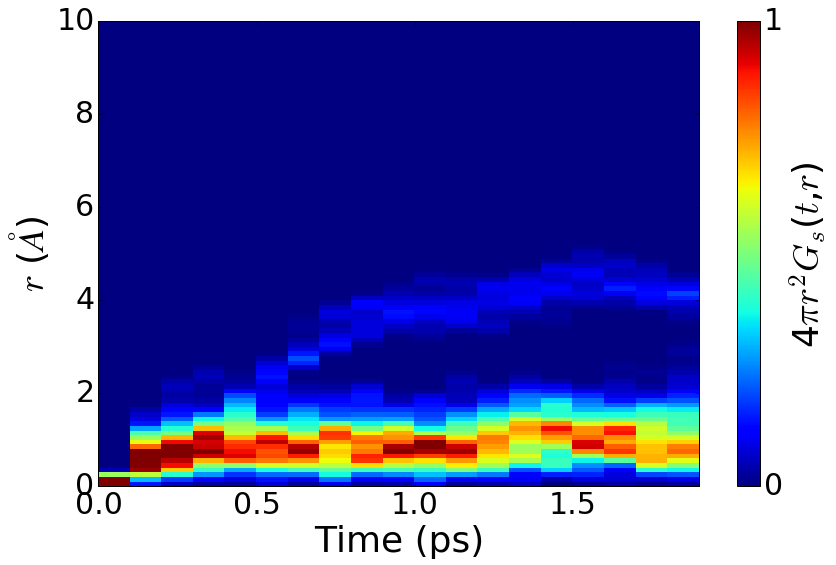

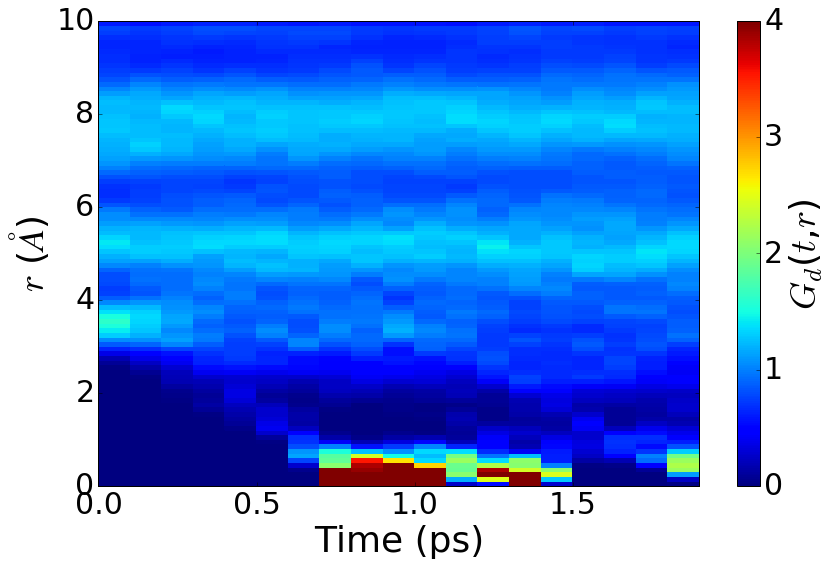

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.analysis.diffusion_analyzer import DiffusionAnalyzer
from pymatgen_diffusion.aimd.van_hove import VanHoveAnalysis

%matplotlib inline

data = json.load(open("../pymatgen_diffusion/aimd/tests/cNa3PS4_pda.json", "r"))

new_obj = DiffusionAnalyzer.from_dict(data)

vhfunc = VanHoveAnalysis(diffusion_analyzer=new_obj, avg_nsteps=5, ngrid=101, rmax=10.0, 
                         step_skip=5, sigma=0.1, species = ["Li", "Na"])

vhfunc.get_3d_plot(type="self")
vhfunc.get_3d_plot(type="distinct")

<module 'matplotlib.pyplot' from '/Users/iekhengchu/.pyenv/versions/3.5.1/lib/python3.5/site-packages/matplotlib/pyplot.py'>

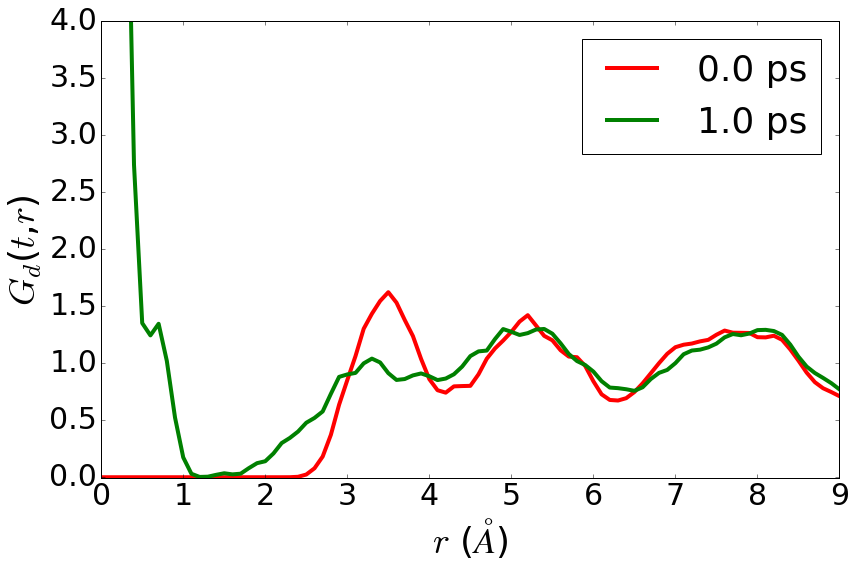

In [3]:
vhfunc.get_1d_plot(type="distinct", times=[0.0, 1.0], colors=["r", "g"])

# Example of RadialDistributionFunction class

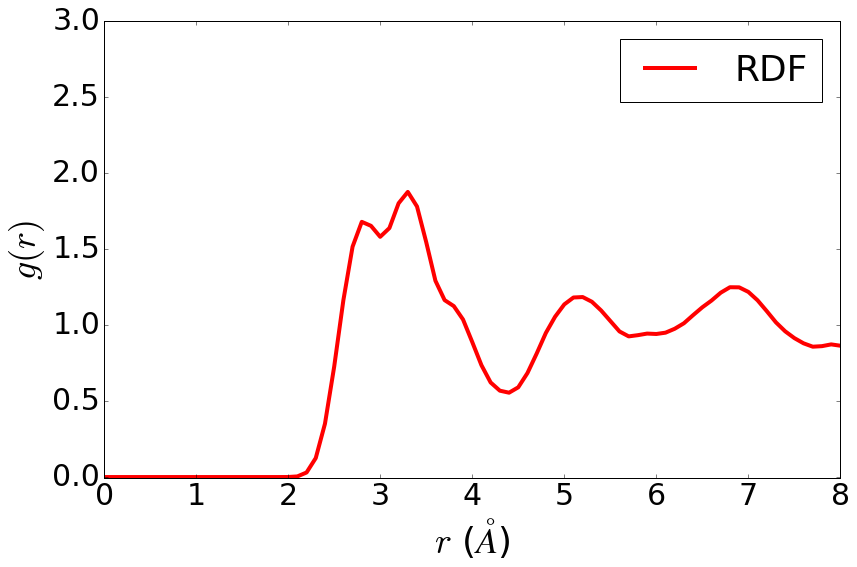

In [4]:
import json
import numpy as np
from pymatgen.analysis.diffusion_analyzer import DiffusionAnalyzer
from pymatgen_diffusion.aimd.van_hove import RadialDistributionFunction

%matplotlib inline

# The generated structure list in this example is for illustration purposes only.
data = json.load(open("../pymatgen_diffusion/aimd/tests/cNa3PS4_pda.json", "r"))
new_obj = DiffusionAnalyzer.from_dict(data)

structure_list = []
for i, s in enumerate(new_obj.get_drift_corrected_structures()):
    structure_list.append(s)
    if i == 9: break

# Compute and plot RDF for Na and S        
species = ["Na", "S"]
obj = RadialDistributionFunction(structure_list, ngrid=101, rmax=10.0, cellrange=1, sigma=0.1, species = species)
plt = obj.get_rdf_plot(label="RDF")